<a href="https://colab.research.google.com/github/RYOMAKUNG/KKU_data_mining/blob/master/RF_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

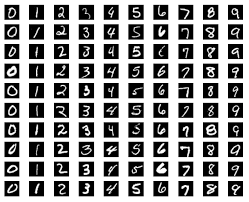

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

0

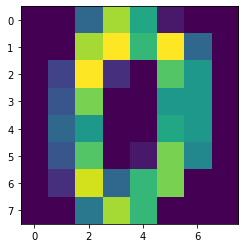

In [4]:
from matplotlib import pyplot as plt 
plt.imshow(digits['images'][0])
digits['target'][0]

###0.1 split data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_trian, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.2, random_state=6)

In [8]:
y_test.shape

(360,)

In [9]:
y_train.shape

(1437,)

0.2 test decision tree performance

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(random_state=0)

In [12]:
tree.fit(X_trian, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
tree.score(X_test,y_test)

0.8388888888888889

#Random Forests

1 Bootstrap sampling the training data

In [15]:
N=100 #number of trees the forest

In [21]:
training_data = list()
for i in range(N): ##ต้นไม้แต่ละอันเห็น data = 80%
  x_sp, x_dp, y_sp, y_dp = train_test_split(X_trian, y_train, test_size=0.2, random_state = i+6)
  training_data.append({'X':x_sp,'y':y_sp})

##2Train separately

In [22]:
classifier_forest = list()
for i in range(N):
  tree = DecisionTreeClassifier(max_features='sqrt',random_state=i+2)
  tree.fit(training_data[i]['X'], training_data[i]['y'])
  classifier_forest.append(tree)

##3T To predict,aggregating

In [23]:
prediction = list()
for i in range(N):
  pred = classifier_forest[i].predict(X_test)
  #print(pred)
  prediction.append(pred)

In [24]:
prediction

[array([1, 9, 6, 0, 8, 5, 7, 8, 4, 2, 7, 6, 2, 6, 0, 7, 9, 3, 1, 3, 7, 2,
        2, 2, 0, 6, 8, 6, 5, 5, 0, 2, 7, 3, 5, 3, 6, 7, 6, 5, 7, 6, 2, 8,
        2, 7, 4, 7, 6, 6, 4, 1, 6, 8, 6, 4, 1, 2, 0, 2, 7, 3, 4, 0, 4, 7,
        5, 7, 1, 4, 5, 0, 4, 1, 0, 0, 5, 8, 3, 0, 0, 2, 3, 0, 8, 1, 4, 0,
        8, 2, 9, 9, 7, 1, 3, 8, 4, 3, 4, 6, 0, 4, 9, 1, 1, 4, 7, 1, 6, 7,
        5, 6, 5, 0, 5, 4, 3, 1, 4, 0, 1, 4, 5, 5, 3, 7, 2, 7, 1, 0, 0, 9,
        1, 8, 1, 6, 3, 4, 9, 8, 7, 7, 4, 6, 6, 2, 3, 8, 3, 7, 3, 5, 3, 8,
        5, 1, 2, 1, 1, 8, 8, 2, 6, 8, 0, 5, 2, 3, 5, 2, 7, 1, 2, 8, 3, 0,
        4, 7, 6, 5, 0, 1, 2, 7, 0, 9, 4, 2, 3, 8, 5, 3, 2, 9, 0, 4, 8, 2,
        3, 4, 4, 0, 5, 7, 0, 2, 3, 9, 2, 1, 2, 5, 7, 8, 7, 3, 0, 2, 9, 7,
        1, 7, 0, 0, 2, 7, 2, 4, 1, 7, 2, 6, 2, 8, 1, 2, 8, 2, 5, 7, 5, 6,
        0, 5, 6, 5, 3, 5, 9, 6, 2, 5, 2, 4, 3, 7, 4, 1, 9, 2, 3, 3, 1, 9,
        7, 9, 3, 3, 5, 9, 4, 6, 8, 2, 5, 4, 6, 0, 7, 4, 4, 5, 2, 0, 9, 8,
        5, 8, 7, 9, 0, 6, 7, 2, 1, 6, 

In [26]:
from scipy import stats
import numpy as np

In [27]:
m = stats.mode(np.array(prediction))

In [28]:
m

ModeResult(mode=array([[1, 9, 6, 0, 8, 5, 7, 8, 4, 2, 7, 6, 2, 6, 0, 7, 4, 3, 1, 3, 7, 2,
        2, 2, 0, 6, 2, 6, 5, 0, 0, 2, 7, 3, 5, 6, 6, 7, 6, 5, 7, 6, 2, 8,
        2, 7, 4, 7, 6, 6, 6, 1, 6, 8, 6, 4, 1, 2, 0, 2, 4, 3, 4, 0, 4, 7,
        5, 4, 1, 9, 5, 0, 4, 1, 0, 0, 5, 8, 3, 0, 0, 2, 8, 0, 8, 1, 4, 0,
        8, 2, 9, 9, 1, 1, 5, 8, 4, 8, 4, 6, 0, 4, 9, 1, 1, 4, 7, 1, 6, 7,
        5, 4, 5, 0, 5, 4, 3, 6, 4, 0, 1, 4, 5, 5, 3, 1, 2, 1, 1, 0, 7, 5,
        1, 4, 9, 6, 8, 4, 9, 8, 7, 4, 4, 6, 6, 2, 3, 9, 3, 7, 3, 5, 3, 8,
        5, 1, 2, 1, 1, 8, 8, 2, 6, 9, 0, 5, 3, 3, 5, 7, 7, 1, 4, 8, 3, 0,
        4, 7, 6, 5, 0, 1, 2, 4, 9, 9, 4, 2, 2, 8, 5, 3, 2, 9, 0, 4, 8, 2,
        3, 4, 4, 0, 5, 7, 0, 2, 3, 9, 2, 1, 8, 5, 7, 8, 7, 3, 0, 2, 9, 7,
        7, 7, 0, 0, 2, 4, 2, 4, 8, 7, 0, 6, 2, 0, 2, 2, 9, 2, 5, 7, 5, 6,
        0, 5, 6, 5, 3, 0, 9, 6, 2, 5, 2, 4, 3, 7, 4, 1, 9, 2, 3, 3, 1, 9,
        7, 9, 3, 3, 5, 2, 4, 1, 8, 2, 5, 9, 6, 0, 7, 4, 4, 8, 2, 0, 9, 8,
        5, 3, 7, 3, 0,

##4 Evaluation

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,m.mode.squeeze())

0.9833333333333333

#Use SKLearn Random Forests

In [31]:
from sklearn.ensemble import  RandomForestClassifier
skRF = RandomForestClassifier()
skRF.fit(X_trian,y_train)
skRF.score(X_test,y_test)

0.9861111111111112